In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('cbsa-est2019-alldata.csv')
print(len(df))

2797


In [17]:
df.columns

Index(['CBSA', 'MDIV', 'STCOU', 'NAME', 'LSAD', 'CENSUS2010POP',
       'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
       'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014',
       'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017',
       'POPESTIMATE2018', 'POPESTIMATE2019', 'NPOPCHG2010', 'NPOPCHG2011',
       'NPOPCHG2012', 'NPOPCHG2013', 'NPOPCHG2014', 'NPOPCHG2015',
       'NPOPCHG2016', 'NPOPCHG2017', 'NPOPCHG2018', 'NPOPCHG2019',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'BIRTHS2016', 'BIRTHS2017', 'BIRTHS2018', 'BIRTHS2019',
       'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013', 'DEATHS2014',
       'DEATHS2015', 'DEATHS2016', 'DEATHS2017', 'DEATHS2018', 'DEATHS2019',
       'NATURALINC2010', 'NATURALINC2011', 'NATURALINC2012', 'NATURALINC2013',
       'NATURALINC2014', 'NATURALINC2015', 'NATURALINC2016', 'NATURALINC2017',
       'NATURALINC2018', 'NATURALINC2019', 'INTERNATIONALMIG2010',

,NAME,YEAR,POPESTIMATE
0,"New York-Newark-Jersey City, NY-NJ-PA",2010,18923407
1,"Los Angeles-Long Beach-Anaheim, CA",2010,12838417
2,"Chicago-Naperville-Elgin, IL-IN-WI",2010,9470634
3,"Dallas-Fort Worth-Arlington, TX",2010,6392065
4,"Houston-The Woodlands-Sugar Land, TX",2010,5947236
...,...,...,...
95,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2019,6280487
96,"Miami-Fort Lauderdale-Pompano Beach, FL",2019,6166488
97,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2019,6102434
98,"Atlanta-Sandy Springs-Alpharetta, GA",2019,6020364


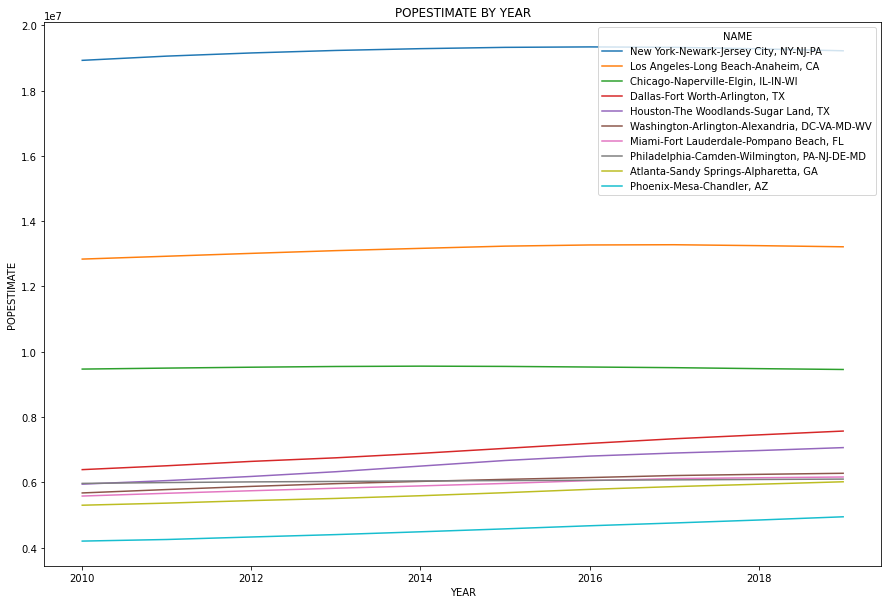

In [27]:
def melt_for_variable(df, column='POPESTIMATE', top=10, rate=False, tail=False):
    df = df.sort_values(column+str(2019), ascending=False).reset_index(drop=True)
    
    if not tail:
        df_top = df.query("LSAD == 'Metropolitan Statistical Area'").head(top)
    else:
        df_top = df.query("LSAD == 'Metropolitan Statistical Area'").tail(top)
    
    df_melt = df_top.melt(id_vars='NAME', value_vars = [column + str(i) for i in range(2010,2020)], var_name='YEAR', value_name=column)
    df_melt.YEAR = [df_melt.loc[i].YEAR.replace(column,'') for i in range(len(df_melt))]
    df_melt.YEAR = df_melt.YEAR.astype(int)
    df_melt[column] = df_melt[column].astype(int)
    
    # Plot the graph
    plt.figure(figsize = (15,10))
    sns.lineplot(data=df_melt, x='YEAR', y=column, hue='NAME').set(title=column + " BY YEAR")
    
    return df_melt

melt_for_variable(df, column='POPESTIMATE', top=10)

,NAME,YEAR,NPOPCHG
0,"Charleston, WV",2010,-180
1,"Santa Rosa-Petaluma, CA",2010,894
2,"Pittsburgh, PA",2010,796
3,"Urban Honolulu, HI",2010,3079
4,"Cleveland-Elyria, OH",2010,-1799
...,...,...,...
95,"Chico, CA",2019,-11153
96,"Panama City, FL",2019,-11535
97,"Chicago-Naperville-Elgin, IL-IN-WI",2019,-25619
98,"Los Angeles-Long Beach-Anaheim, CA",2019,-35080


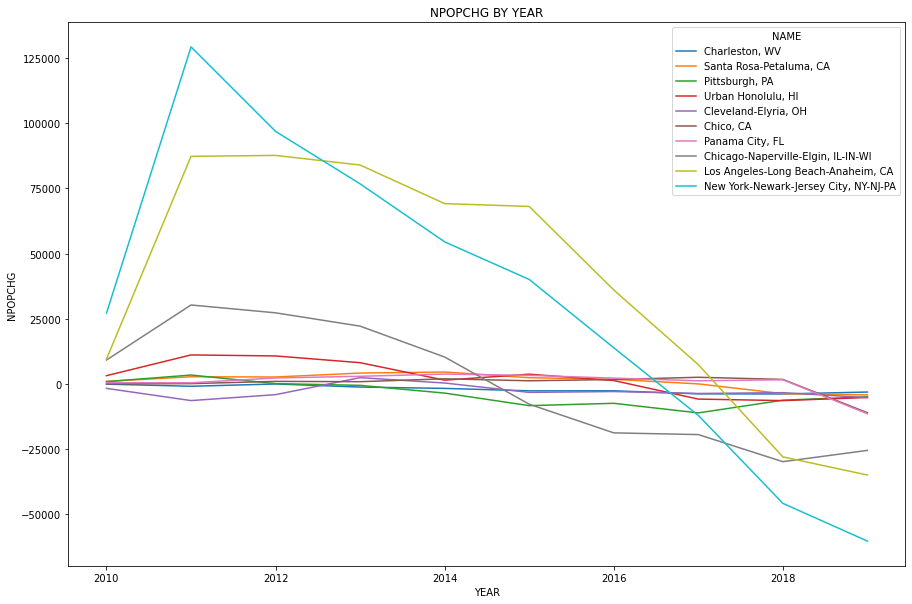

In [29]:
melt_for_variable(df, column='NPOPCHG', top=10, tail=True)